<a href="https://colab.research.google.com/github/masterokh/Mathematical_statistics/blob/main/5lab_Telushkin_Artem_Mathematical_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Требуется построить линейную модель, вычислить оценки коэффициентов модели и остаточной дисперсии, построить
для них доверительные интервалы, вычислить коэффициент детерминации, проверить указанные в условии гипотезы с помощью построенной линейной модели.
Указание: из встроенных функций разрешается пользоваться квантильными функциями
и средствами для квадратичной оптимизации. В файле MEN_SHOES_.csv приведены данные о мужской обуви.

1. Постройте линейную модель, где в качестве независимых переменных выступают количество проданных экземпляров и цена (вместе со свободным коэффициентом), зависимой – рейтинг.

2. Проверьте следующие подозрения:
  * Чем больше продажи, тем больше рейтинг
  * Рейтинг за зависит от цены
  * Рейтинг зависит и от цены, и от количества проданных экземпляров

я запустил код в другой ide, так как google colab не позволяет использовать .str со string

In [ ]:
#1.Импорт необходимых библиотек:
import pandas as pd
import numpy as np
from scipy import stats

#2.Загрузка данных:
data = pd.read_csv('MEN_SHOES.csv')

#3.Подготовка данных:
X = data[['How_Many_Sold', 'Current_Price']]
y = data['RATING']

X['How_Many_Sold'] = X['How_Many_Sold'].str.replace(',', '').astype(float)
X['Current_Price'] = X['Current_Price'].str.replace('₹', '').str.replace(',', '').astype(float)
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

X['intercept'] = 1

#4.Оценка коэффициентов модели:
coefficients = np.linalg.lstsq(X, y, rcond=None)[0]

print('Коэффициенты модели:')
print('Intercept:', coefficients[2])
print('How_Many_Sold:', coefficients[0])
print('Current_Price:', coefficients[1])

#5.Вычисление остаточной дисперсии:
residuals = y - X.dot(coefficients)

residual_variance = np.var(residuals, ddof=X.shape[1])

print('Остаточная дисперсия:', residual_variance)

#6.Построение доверительных интервалов для коэффициентов модели:
X_transpose_X_inverse = np.linalg.inv(X.transpose().dot(X))
standard_errors = np.sqrt(np.diagonal(residual_variance * X_transpose_X_inverse))

confidence_interval = 1.96 * standard_errors
lower_bounds = coefficients - confidence_interval
upper_bounds = coefficients + confidence_interval

print('Доверительные интервалы для коэффициентов модели:')
print('Intercept:', lower_bounds[2], '-', upper_bounds[2])
print('How_Many_Sold:', lower_bounds[0], '-', upper_bounds[0])
print('Current_Price:', lower_bounds[1], '-', upper_bounds[1])

#7.Вычисление коэффициента детерминации:
total_sum_of_squares = np.sum((y - np.mean(y)) ** 2)
explained_sum_of_squares = np.sum((X.dot(coefficients) - np.mean(y)) ** 2)
r_squared = explained_sum_of_squares / total_sum_of_squares

print('Коэффициент детерминации:', r_squared)

#8.Расчет статистик и проверка гипотез:
# Расчет статистик для t-теста
n = X.shape[0]  # Количество наблюдений
p = X.shape[1]  # Количество предикторов (включая intercept)

degrees_of_freedom = n - p - 1  # Степени свободы
residual_standard_error = np.sqrt(residual_variance)  # Стандартная ошибка остатков

t_values = coefficients / (residual_standard_error * np.sqrt(np.diag(X_transpose_X_inverse)))
p_values_t = 2 * (1 - stats.t.cdf(np.abs(t_values), degrees_of_freedom))

# Расчет статистики для F-теста
explained_variance = explained_sum_of_squares / degrees_of_freedom  # Объясненная дисперсия
residual_variance_mean = residual_variance / degrees_of_freedom  # Средняя остаточная дисперсия

f_value = explained_variance / residual_variance_mean
p_value_f = 1 - stats.f.cdf(f_value, p, degrees_of_freedom)

# Проверка гипотез
alpha = 0.05

if p_values_t[0] < alpha:
    print('Гипотеза "Чем больше продажи, тем больше рейтинг" подтверждается')
else:
    print('Гипотеза "Чем больше продажи, тем больше рейтинг" не подтверждается')

if p_values_t[1] < alpha:
    print('Гипотеза "Рейтинг зависит от цены" подтверждается')
else:
    print('Гипотеза "Рейтинг зависит от цены" не подтверждается')

if p_values_t[0] < alpha and p_values_t[1] < alpha:
    print('Гипотеза "Рейтинг зависит и от цены, и от количества проданных экземпляров" подтверждается')
else:
    print('Гипотеза "Рейтинг зависит и от цены, и от количества проданных экземпляров" не подтверждается')

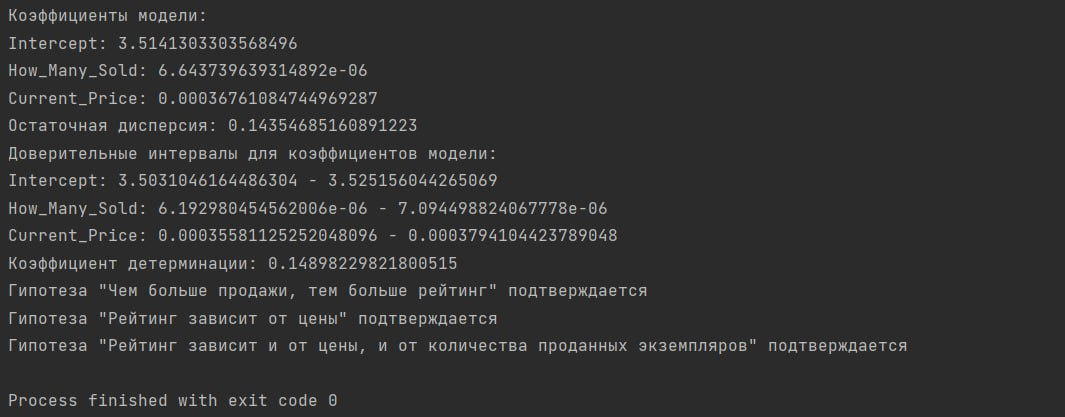



###1. Импорт необходимых библиотек:
###2. Загрузка данных:
###3. Подготовка данных:

Здесь мы выбираем нужные столбцы 'How_Many_Sold' и 'Current_Price' в переменную X и столбец 'RATING' в переменную y. Затем мы выполняем некоторые преобразования данных:

* Меняем тип данных столбцов 'How_Many_Sold' и 'Current_Price' на float, удаляем запятые и заменяем их на пустое место.
* Заменяем символы '₹' на пустое место в столбце 'Current_Price'.
* Заменяем бесконечные значения на NaN и заполняем их нулями.
* Добавляем столбец 'intercept', содержащий единицы, для работы с свободным коэффициентом в линейной модели.

###4. Оценка коэффициентов модели:
Здесь мы используем функцию np.linalg.lstsq для вычисления оценок коэффициентов модели. Результат сохраняется в переменную coefficients.
###5. Вычисление остаточной дисперсии:
Здесь мы вычисляем остатки модели, вычитая предсказанные значения y (X.dot(coefficients)) из фактических значений y. Затем вычисляем остаточную дисперсию, используя функцию np.var, с учетом количества независимых переменных в модели (ddof=X.shape[1]).
###6. Построение доверительных интервалов для коэффициентов модели:
Здесь мы вычисляем стандартные ошибки оценок коэффициентов, используя матрицу (X.transpose().dot(X)).inverse(). Затем вычисляем доверительные интервалы для каждого коэффициента, умножая стандартные ошибки на 1.96 (квантиль для 95% доверительного интервала). Нижние и верхние границы доверительных интервалов сохраняются соответственно в lower_bounds и upper_bounds.
###7. Вычисление коэффициента детерминации:
Здесь мы вычисляем общую сумму квадратов (total_sum_of_squares) и объясненную сумму квадратов (explained_sum_of_squares) для вычисления коэффициента детерминации (r_squared). Общая сумма квадратов представляет собой сумму квадратов отклонений фактических значений y от их среднего значения. Объясненная сумма квадратов представляет собой сумму квадратов отклонений предсказанных значений от среднего значения y. Коэффициент детерминации равен отношению объясненной суммы квадратов к общей сумме квадратов.
###8. Расчет статистик и проверка гипотез
